In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math # for the function factorials, comb, etc

N = 10000

In this notebook, you will create a random number generator class that generates samples from a given probability distribution. Please use the methods studied in class to implement the generator.

Use `self.random(n)` to generate `n` random numbers from a uniform distribution over [0,1). See the function `RNG.uniform` and `RNG.bernoulli` for examples. You are not allowed to use any other random number generator functions from Python's libraries.

The generator should be able to sample from the following distributions:
  
  1. Binomial
  2. Exponential
  3. Normal
  4. Mixture of Normals
  5. Poisson (using exponential inter-arrival times)
  6. Beta 
  7. Triangular (derivation in HW)
  8. Weibull (derivation in HW)  

Once defined, test your generator by sampling from the distributions and plotting a histogram. For continuous distributions, you should also plot the true probability density function. Do not use the library functions for pdf, but instead write down their explicit algebraic formulas. For discrete distributions, you should don't need to plot the probability mass function.

In [33]:

class RNG:
    def __init__(self, seed=None):
        self._rng = np.random.default_rng(seed)
        self.random = self._rng.random
    
    def seed(self, seed=None):
        self._rng = np.random.default_rng(seed)
    
    def uniform(self, low=0.0, high=1.0, size=None):
        return low + (high - low) * self.random(size)
    
    # choose a random object from a list
    def choice(self, list_, size=None):
        u = self.random(size)
        return list_[np.floor(u * len(list_)).astype(int)]
    
    def bernoulli(self, p=0.5, size=None):
        assert 0 <= p <= 1, "p must be between 0 and 1"
        u = self.random(size)
        return (u < p).astype(int)
        
    def binomial(self, n=1, p=0.5, size=None):
        assert 0 <= p <= 1, "p must be between 0 and 1"
        sample = lambda x, y: np.sum(self.bernoulli(x, y))
        return np.array([sample(p, n) for _ in range(size)])
    
    def exponential(self, lambda_=1.0, size=None):
        assert lambda_ > 0, "lambda must be positive"
        return -1/lambda_ * np.log(1 - self.uniform(size=size))
    
    def normal(self, mean=0.0, std=1.0, size=None):
        R = np.sqrt(-2 * np.log(1 - self.uniform(size=size))) # u1
        Theta = 2 * np.pi * self.uniform(size=size) # u2
        return mean + std * R * np.cos(Theta) # element-wise multiplication
    
    def mixture(self, weights, normals, size=None):
        assert len(weights) == len(normals), "len(weights) == len(normals)"
        assert np.isclose(np.sum(weights), 1), "sum(weights) must be 1"
        ... # delete this line and write your code here
        
    def poisson(self, lambda_=1.0, size=None):
        assert lambda_ > 0, "lambda must be positive"
        samples = np.zeros(size)
        for i in range(size):
            N, sum = 0, 0
            while True:
                X = self.exponential(lambda_, size=1)
                sum += X
                if sum > 1:
                    break
                N += 1
            samples[i] = N
        return samples

    
    def beta(self, a=1.0, b=1.0, size=None):
        assert a > 0 and b > 0, "a and b must be positive"
        assert isinstance(a, int) and isinstance(b, int), "a and b must be integers for this specific implementation"
        k, n = a, b + a - 1
        samples = np.array([self.uniform(size=n) for _ in range(size)])
        samples.sort(axis=1)
        return np.array([row[k-1] for row in samples])


    def triangular(self, low=0.0, high=1.0, mode=None, size=None):
        assert low <= mode <= high, "low <= mode <= high"
        samples = self.uniform(size=size)
        samples.sort()
        crit = (mode - low) / (high - low)
        return np.where(
            samples < crit, 
            low + np.sqrt(samples * (high - low) * (mode - low)), 
            high - np.sqrt((1 - samples) * (high - low) * (high - mode))
            )

            
    def weibull(self, shape=1.0, scale=1.0, size=None):
        assert shape > 0, "shape must be positive"
        assert scale > 0, "scale must be positive"
        return scale * (-np.log(1 - self.uniform(size=size)))**(1/shape)
    
rng = RNG()

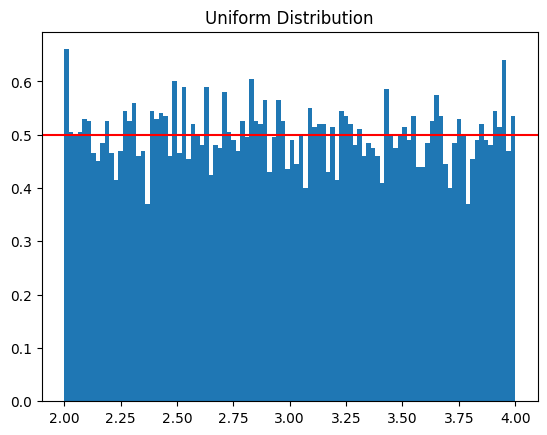

In [34]:
# test uniform distribution
rng.seed(0)

low = 2
high = 4
uniform = rng.uniform(low, high, N)

plt.hist(uniform, bins = 100, density=True)
plt.title('Uniform Distribution')
plt.axhline(y=1/(high - low), color='r', linestyle='-')
plt.show()

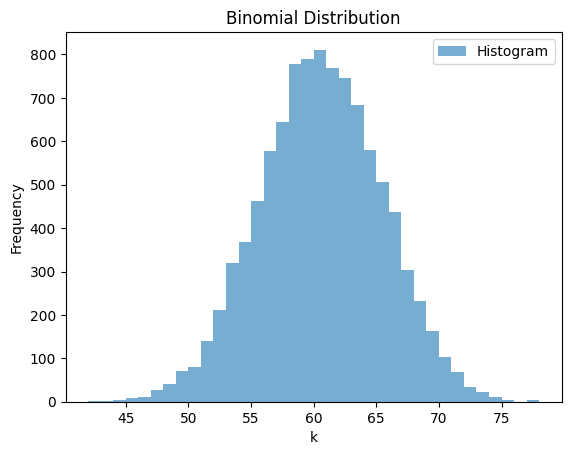

In [35]:
# test for binomial distribution for n=100, p=0.6
rng.seed(0)

n=100
p=0.6

binomial = rng.binomial(n, p, N)

# Plot histogram 
plt.hist(binomial, bins=np.arange(binomial.min(), binomial.max()), alpha=0.6, label="Histogram") 
plt.xlabel('k')
plt.ylabel('Frequency')
plt.title('Binomial Distribution')
plt.legend()
plt.show()

# we'll skip plotting the pmf as it's a complicated to plot alongside a histogram


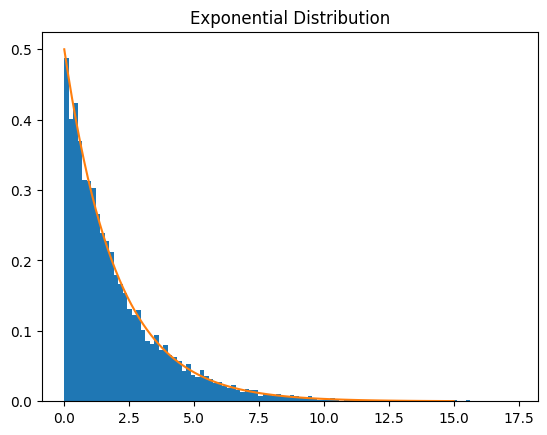

In [36]:
# test exponential distribution for lambda = 0.5
rng.seed(0)

lambda_ = 0.5
exponential = rng.exponential(lambda_, N)

plt.hist(exponential, bins=100, density=True)

# plot the pdf
x = np.linspace(0, 15, 100)
pdf = lambda_ * np.exp(-lambda_ * x)
plt.plot(x, pdf)

plt.title('Exponential Distribution')
plt.show()

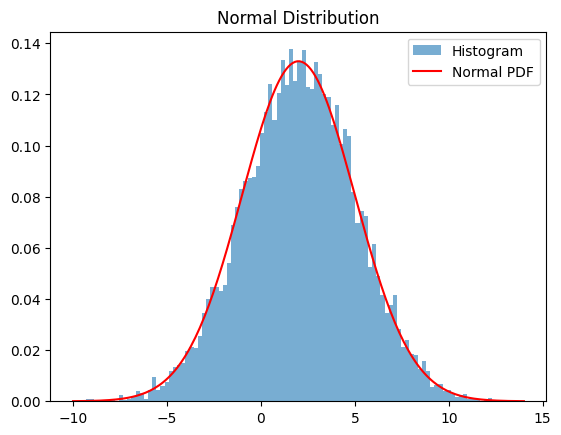

In [37]:
# test normal distribution for mean = 2 and std = 3
rng.seed(0)

mean = 2
std = 3

normal = rng.normal(mean, std, N)

# Plot histogram with density normalization
plt.hist(normal, bins=100, density=True, alpha=0.6, label="Histogram")

# Correct PDF
x = np.linspace(-10, 14, 200)  # Adjust range for better visualization
pdf = 1 / np.sqrt(2 * np.pi * std**2) * np.exp(-1 * (x - mean)**2 / (2 * std**2))

plt.plot(x, pdf, 'r-', label="Normal PDF")
plt.title('Normal Distribution')
plt.legend()
plt.show()


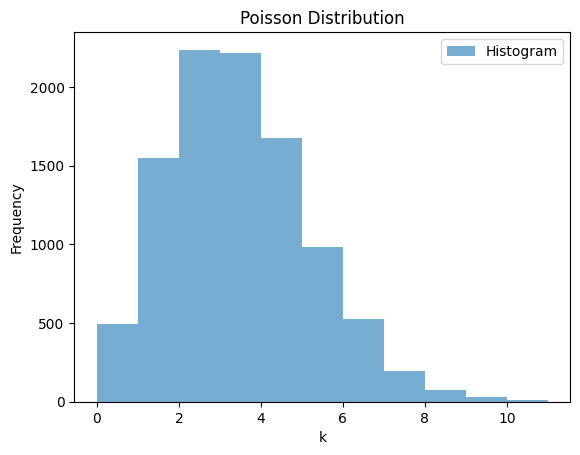

In [38]:
# test poisson distribution with lambda = 3
rng.seed(0)

lambda_ = 3
poisson = rng.poisson(lambda_, N)

plt.hist(poisson, bins=np.arange(poisson.min(), poisson.max()), alpha=0.6, label="Histogram") 
plt.xlabel('k')
plt.ylabel('Frequency')
plt.title('Poisson Distribution')
plt.legend()
plt.show()

# skip plotting the pmf

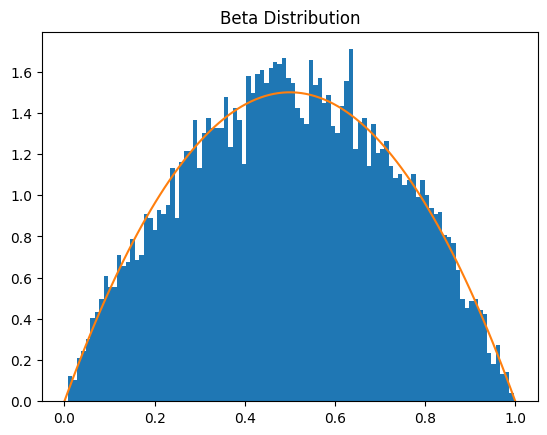

In [39]:
# test beta distribution with a=2, b=2
import scipy.special

rng.seed(0)

a, b = 2, 2
beta = rng.beta(a, b, N)

plt.hist(beta, bins=100, density=True)

# plot the pdf
x = np.linspace(0, 1, 100)
pdf = x**(a-1) * (1-x)**(b-1) / scipy.special.beta(a, b)
plt.plot(x, pdf)

plt.title('Beta Distribution')
plt.show()

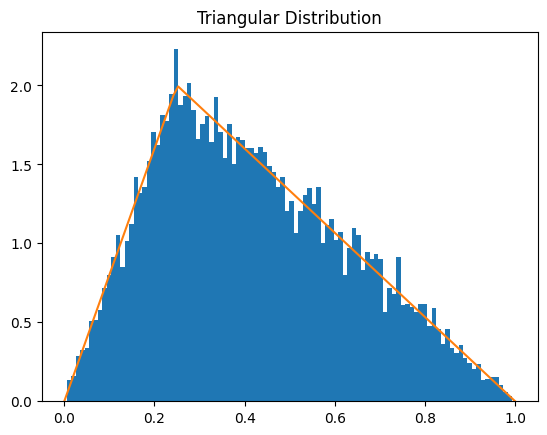

In [40]:
# test triangular distribution for a=0, b=1, mode=0.25
rng.seed(0)

a, b, mode = 0, 1, 0.25
triangular = rng.triangular(a, b, mode, N)

plt.hist(triangular, bins=100, density=True)

# plot the pdf
x = np.linspace(0, 1, 100)
pdf = np.where(x < mode, 2 * (x - a) / ((b - a) * (mode - a)), 2 * (b - x) / ((b - a) * (b - mode)))
plt.plot(x, pdf)

plt.title('Triangular Distribution')
plt.show()

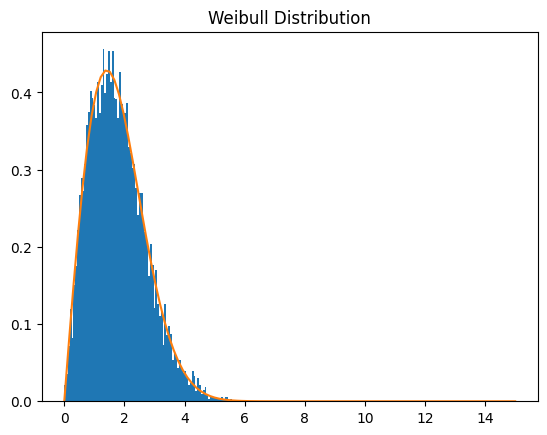

In [41]:
# test Weibull distribution for k=2, lambda=2
rng.seed(0)

k, lambda_ = 2, 2
weibull = rng.weibull(k, lambda_, N)

plt.hist(weibull, bins=100, density=True)

# plot the pdf
x = np.linspace(0, 15, 100)
pdf = (k / lambda_) * (x / lambda_)**(k-1) * np.exp(-(x / lambda_)**k)
plt.plot(x, pdf)

plt.title('Weibull Distribution')
plt.show()